## Credit  Card Balance History

### Does people control their credit card balance when the time close to the loan application?

I believe that people who plan to apply a big loan such as a motgage for purchasing a house would control their credit history, especially when they made a decision of buying a house at around a year to six months earlier of the purchasing. From this historical credit card balance data for 103558 loan applicants, we are interested in discovering any differences etween credit card balance in the time frame of before and after one year.

We aggregate data by the applicants and time stamps, separately.  Applicants are informed in unique numbers as ID and time stamps are informed in negative integers in months to imply past-time from the moment of the application.  This means that the time of zero represents the current month of applying, and the smaller number the further away from that time of applying.

Data table consists of monthly data of previous credit cards such as monthly balance, limit, receivable, number of transactions and so on.  we check the missing values and implement them first.  Then we execute the new columns for the number of records, number of cards, number of monthly draws, mean of the monthly balance, mean of the difference between the limit and draw, mean of delays in days and total of receivables for each applicant.  And, we analyse this aggregation to produce histogram, scatter plots and correlations. We do analyse the timewise aggregation in a similar manner and add an extra feature of time-series plots.

In [1]:
# Loading modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from scipy import stats

In [2]:
# Loading data 
cc_bal = pd.read_csv('credit_card_balance.csv')

In [3]:
# Number of rows and columns
print('Credit Card Balance: {}'.format(cc_bal.shape))

Credit Card Balance: (3840312, 23)


### Credit Card Balance

In [4]:
# Sort by current and previous IDs
cc_bal = cc_bal.sort_values(['SK_ID_CURR', 'SK_ID_PREV'])
cc_bal.head(20)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
520387,1489396,100006,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
584804,1489396,100006,-1,0.000,270000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
655566,1489396,100006,-5,0.000,270000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1347528,1489396,100006,-3,0.000,270000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1399895,1489396,100006,-4,0.000,270000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
1636141,1489396,100006,-6,0.000,270000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
35799,1843384,100011,-48,75109.950,180000,0.0,0.0,0.0,0.0,9000.0,...,75109.950,75109.950,0.0,0,0.0,0.0,27.0,Active,0,0
51047,1843384,100011,-4,0.000,90000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
131693,1843384,100011,-6,0.000,90000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,33.0,Active,0,0
153898,1843384,100011,-54,104130.630,180000,0.0,0.0,0.0,0.0,9000.0,...,104130.630,104130.630,0.0,0,0.0,0.0,21.0,Active,0,0


In [5]:
# Function for the percent of missing
def get_na_percent(data):
    missing_percs = []
    
    for var in data.columns: 
        missing_percs.append(np.sum(data[var].isnull()) / len(data[var]) * 100)

    na_per_df = pd.DataFrame({'Variable': data.columns, 'NA_percent': missing_percs})
    return na_per_df.set_index('Variable')

# Missing percentages
get_na_percent(cc_bal)

,NA_percent
Variable,
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
MONTHS_BALANCE,0.000000
AMT_BALANCE,0.000000
AMT_CREDIT_LIMIT_ACTUAL,0.000000
AMT_DRAWINGS_ATM_CURRENT,19.524872
AMT_DRAWINGS_CURRENT,0.000000
AMT_DRAWINGS_OTHER_CURRENT,19.524872
AMT_DRAWINGS_POS_CURRENT,19.524872


In [6]:
# Fill missing with zero an dcheck it
cc_bal = cc_bal.fillna(0)
np.sum(get_na_percent(cc_bal))

NA_percent    0.0
dtype: float64

We have a large number of missing values in the data - they represent no value, means zero mathematically - so we implement these with zeros to aggregte data without error.

### Aggregate data for each applicant

In [7]:
# Function for time unit change
def hms (sec):
    sec = round(sec)
    if sec < 60:
        time = str(sec) + ' seconds'
    elif sec < 3600:
        minute = sec // 60
        second = sec % 60
        time = str(minute) + ' minutes ' + str(second) + ' seconds'
    else:
        hour = sec // 3600
        sec = sec % 3600
        minute = sec // 60
        second = sec % 60
        time = str(hour) + ' hours ' + str(minute) + ' minutes' + str(second) + ' seconds'
    return time   

In [8]:
start = timeit.default_timer()
# List of current IDs
curr_ids = cc_bal.SK_ID_CURR.unique()

# Empty list for storing the number of previous credit cards
card_counts = np.empty(len(curr_ids))       # number of previous cards
record_counts = np.empty(len(curr_ids))     # length of record for each customer
draw_count_mean = np.empty(len(curr_ids))   # mean of the montly drawings for each customer
bal_mean = np.empty(len(curr_ids))          # mean of teh monthly balance for each customer
diff_limit_draw = np.empty(len(curr_ids))   # mean of defferences between limit and draw
tot_receivable = np.empty(len(curr_ids))    # mean of the total receivable of cards
delay_days_mean = np.empty(len(curr_ids))   # Mean of delayed payments in days

# Count the number of cards
for i in range(len(curr_ids)):
    cid = curr_ids[i]
    subset = cc_bal[cc_bal.SK_ID_CURR == cid]
    card_counts[i] = subset.SK_ID_PREV.nunique()
    record_counts[i] = len(subset.MONTHS_BALANCE)
    draw_count_mean[i] = np.mean(subset.CNT_DRAWINGS_CURRENT)
    bal_mean[i] = np.mean(subset.AMT_BALANCE)
    diff_limit_draw[i] = np.mean(subset.AMT_CREDIT_LIMIT_ACTUAL  - subset.AMT_DRAWINGS_CURRENT)
    tot_receivable[i] = np.sum(subset.AMT_RECIVABLE)
    delay_days_mean[i] = np.mean(subset.SK_DPD)

cc_bal_agg = pd.DataFrame({'SK_ID_CURR': curr_ids,
                           'CNT_PREV_CARDS': card_counts,
                           'CNT_CC_BAL_RECORDS': record_counts,
                           'MEAN_DRAW_COUNT': draw_count_mean,
                           'MEAN_BALANCE': bal_mean,
                           'MEAN_DIFF_LIMIT_DRAW': diff_limit_draw,
                           'SUM_RECEIVABLE': tot_receivable,
                           'MEAN_DELAY_DAYS': delay_days_mean})
cc_bal_agg = cc_bal_agg[['SK_ID_CURR', 'CNT_PREV_CARDS', 'CNT_CC_BAL_RECORDS','MEAN_DRAW_COUNT',
                         'MEAN_BALANCE', 'MEAN_DIFF_LIMIT_DRAW', 'SUM_RECEIVABLE', 'MEAN_DELAY_DAYS']]
stop = timeit.default_timer()
print('Time of computing: {}'.format(hms(stop -  start)))

Time of computing: 10 minutes 36 seconds


In [9]:
# First few rows of the aggregated data
cc_bal_agg.head(10)

,SK_ID_CURR,CNT_PREV_CARDS,CNT_CC_BAL_RECORDS,MEAN_DRAW_COUNT,MEAN_BALANCE,MEAN_DIFF_LIMIT_DRAW,SUM_RECEIVABLE,MEAN_DELAY_DAYS
0,100006,1.0,6.0,0.000000,0.000000,270000.000000,0.000,0.000000
1,100011,1.0,74.0,0.054054,54482.111149,161756.756757,4028055.255,0.000000
2,100013,1.0,96.0,0.239583,18159.919219,125765.625000,1737703.665,0.010417
3,100021,1.0,17.0,0.000000,0.000000,675000.000000,0.000,0.000000
4,100023,1.0,8.0,0.000000,0.000000,135000.000000,0.000,0.000000
5,100028,1.0,49.0,2.387755,8085.058163,218843.599592,390461.850,0.000000
6,100036,1.0,12.0,0.000000,0.000000,78750.000000,0.000,0.000000
7,100042,1.0,84.0,0.380952,33356.183036,72826.113214,2797043.760,0.023810
8,100043,1.0,33.0,0.363636,208572.600000,272140.482273,6877115.820,0.000000
9,100047,1.0,36.0,0.000000,0.000000,326250.000000,0.000,0.000000


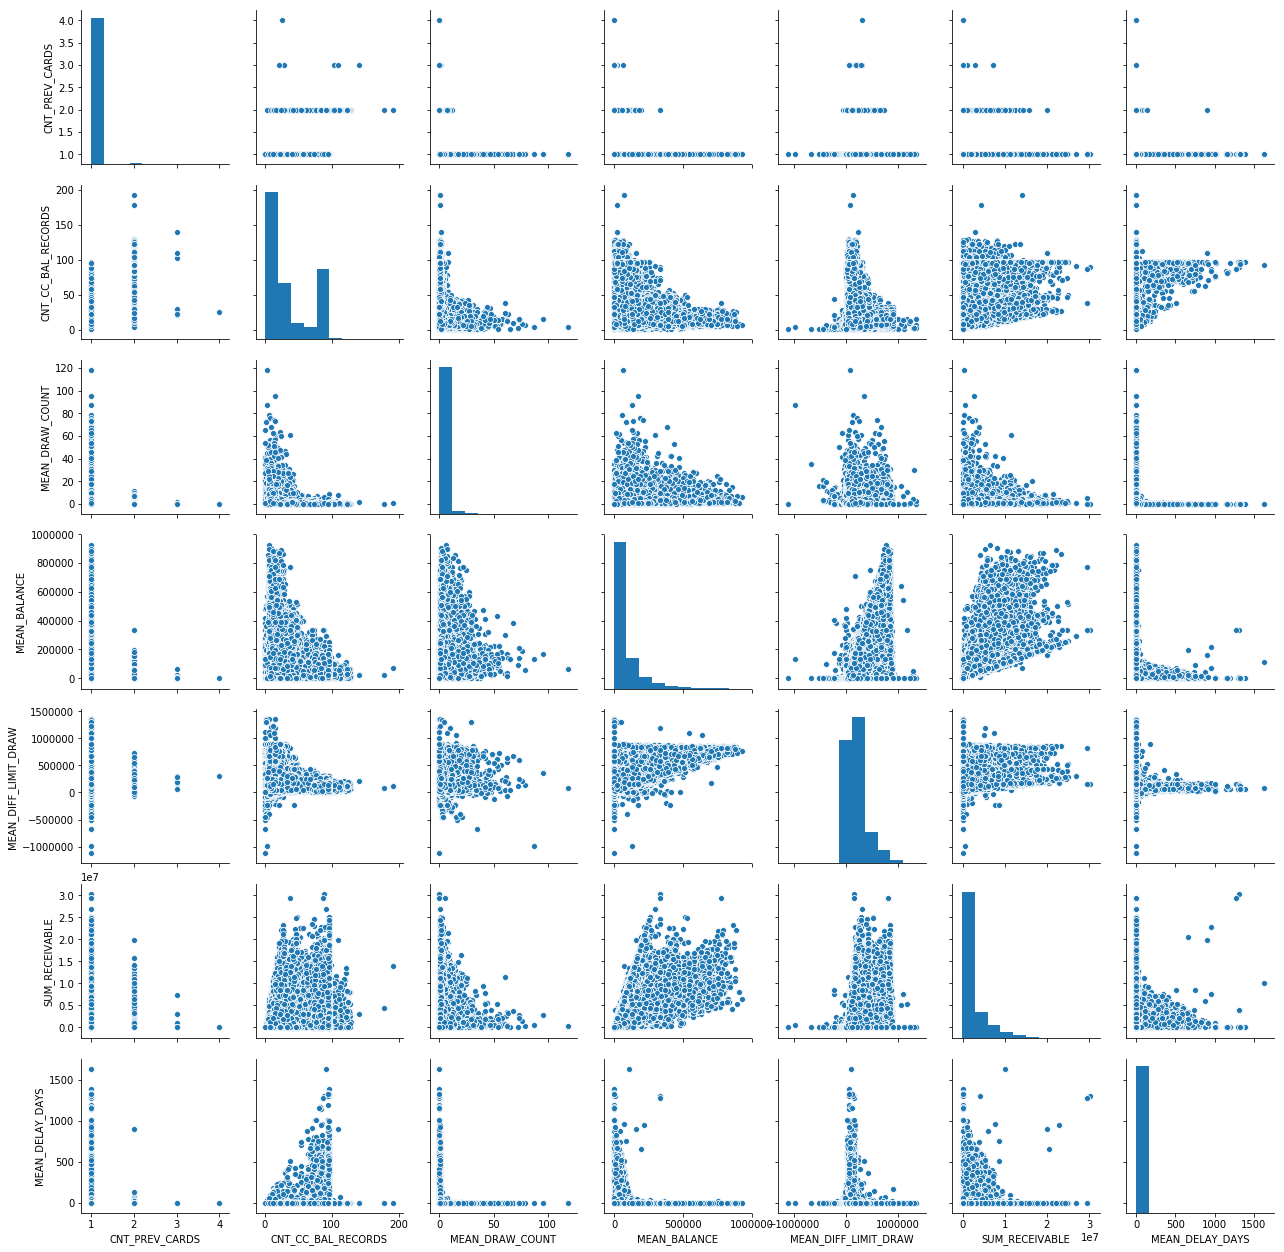

In [10]:
# Outlook of each pair
sns.pairplot(cc_bal_agg.drop('SK_ID_CURR', axis = 1))
plt.show()

In [11]:
# Print number of cards that were previously assigned to each customer
cc_bal_agg.CNT_PREV_CARDS.value_counts()

1.0    102818
2.0       732
3.0         7
4.0         1
Name: CNT_PREV_CARDS, dtype: int64

In [37]:
# Check delay days for only positive values
delay_days = cc_bal_agg.MEAN_DELAY_DAYS[cc_bal_agg.MEAN_DELAY_DAYS > 0]
delay_days.describe()

count    20660.000000
mean        20.587320
std         97.551369
min          0.007937
25%          0.023256
50%          0.083333
75%          0.461538
max       1635.684783
Name: MEAN_DELAY_DAYS, dtype: float64

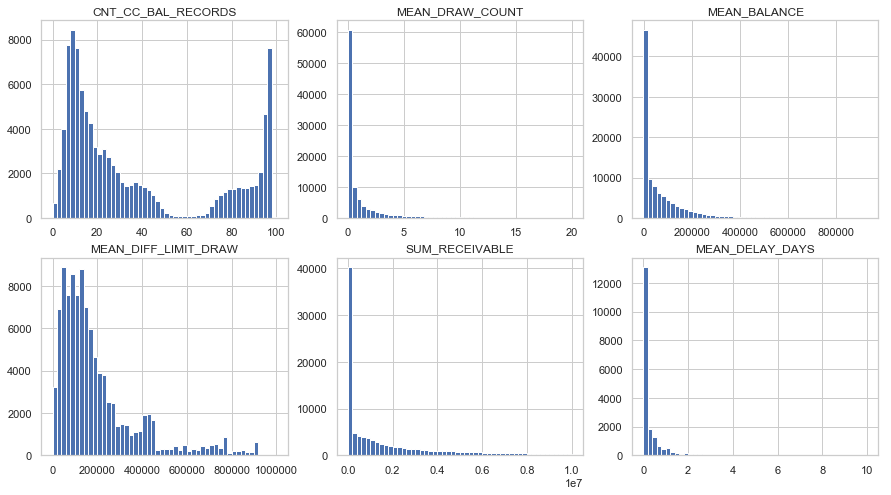

In [40]:
# Histograms of 'CNT_CC_BAL_RECORDS','MEAN_DRAW_COUNT', 'MEAN_BALANCE', 
#               'MEAN_DIFF_LIMIT_DRAW', 'SUM_RECEIVABLE', 'MEAN_DELAY_DAYS'
f, axes = plt.subplots(2, 3, figsize = (15, 8))

axes[0,0].hist(cc_bal_agg.CNT_CC_BAL_RECORDS, range = (0, 100), bins = 50)
axes[0,0].set_title('CNT_CC_BAL_RECORDS')
axes[0,1].hist(cc_bal_agg.MEAN_DRAW_COUNT, range = (0, 20), bins = 50)
axes[0,1].set_title('MEAN_DRAW_COUNT')
axes[0,2].hist(cc_bal_agg.MEAN_BALANCE, bins = 50)
axes[0,2].set_title('MEAN_BALANCE')
axes[1,0].hist(cc_bal_agg.MEAN_DIFF_LIMIT_DRAW, range = (0, 1000000), bins = 50)
axes[1,0].set_title('MEAN_DIFF_LIMIT_DRAW')
axes[1,1].hist(cc_bal_agg.SUM_RECEIVABLE, range = (0, 10000000), bins = 50)
axes[1,1].set_title('SUM_RECEIVABLE')
axes[1,2].hist(delay_days, range = (0, 10), bins = 50)
axes[1,2].set_title('MEAN_DELAY_DAYS')

plt.show()

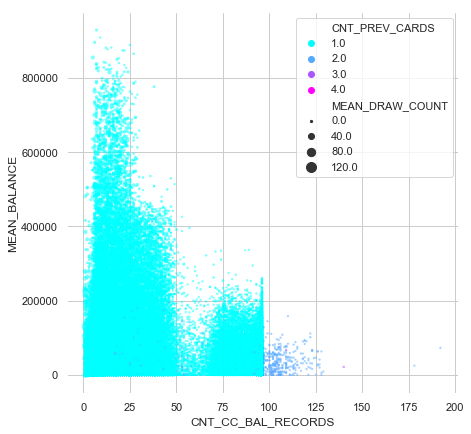

In [13]:
# Scatter plot of mean-balance vs. num-balance-records
# with hue for mean-draw-count and size for num-previous-cards
sns.set(style = 'whitegrid')
f,ax = plt.subplots(figsize = (7, 7))
sns.despine(f, left = True, bottom = True)
sns.scatterplot(x = 'CNT_CC_BAL_RECORDS', y = 'MEAN_BALANCE', 
                hue = 'CNT_PREV_CARDS', size = 'MEAN_DRAW_COUNT',
                palette="cool", sizes = (5, 100), alpha = .5,
                data = cc_bal_agg, linewidth = 0, ax =ax)
plt.show()

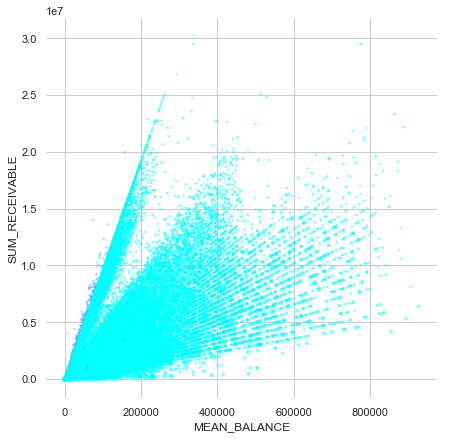

In [14]:
# Scatter plot of sum-receivables vs. mean-balance 
# with hue for mean-draw-count and size for num-previous-cards
sns.set(style = 'whitegrid')
f,ax = plt.subplots(figsize = (7, 7))
sns.despine(f, left = True, bottom = True)
sns.scatterplot(x = 'MEAN_BALANCE', y = 'SUM_RECEIVABLE',
                hue = 'CNT_PREV_CARDS', size = 'MEAN_DRAW_COUNT',
                palette="cool", sizes = (5, 100), alpha = .5,
                data = cc_bal_agg, linewidth = 0, ax =ax)
plt.legend().set_visible(False)
plt.show()

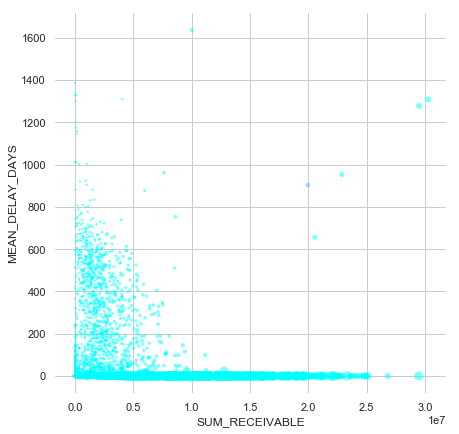

In [15]:
# Scatter plot of  mean-delay-days vs. sum-receivables 
# with hue for mean-draw-count and size for mean-balance
sns.set(style = 'whitegrid')
f,ax = plt.subplots(figsize = (7, 7))
sns.despine(f, left = True, bottom = True)
sns.scatterplot(x = 'SUM_RECEIVABLE',y = 'MEAN_DELAY_DAYS',
                hue = 'CNT_PREV_CARDS', size = 'MEAN_BALANCE',
                palette="cool", sizes = (5, 100), alpha = .5,
                data = cc_bal_agg, linewidth = 0, ax =ax)
plt.legend().set_visible(False)
plt.show()

In [16]:
# Correlation matrix
corr = cc_bal_agg.drop('SK_ID_CURR', axis = 1).corr()
corr

,CNT_PREV_CARDS,CNT_CC_BAL_RECORDS,MEAN_DRAW_COUNT,MEAN_BALANCE,MEAN_DIFF_LIMIT_DRAW,SUM_RECEIVABLE,MEAN_DELAY_DAYS
CNT_PREV_CARDS,1.000000,0.087061,-0.018607,-0.027926,-0.024729,0.012767,-0.004365
CNT_CC_BAL_RECORDS,0.087061,1.000000,-0.245572,-0.120220,-0.290171,0.361519,0.129295
MEAN_DRAW_COUNT,-0.018607,-0.245572,1.000000,0.293386,0.107545,0.044436,-0.035000
MEAN_BALANCE,-0.027926,-0.120220,0.293386,1.000000,0.466967,0.673750,-0.037881
MEAN_DIFF_LIMIT_DRAW,-0.024729,-0.290171,0.107545,0.466967,1.000000,0.232743,-0.046724
SUM_RECEIVABLE,0.012767,0.361519,0.044436,0.673750,0.232743,1.000000,0.001651
MEAN_DELAY_DAYS,-0.004365,0.129295,-0.035000,-0.037881,-0.046724,0.001651,1.000000


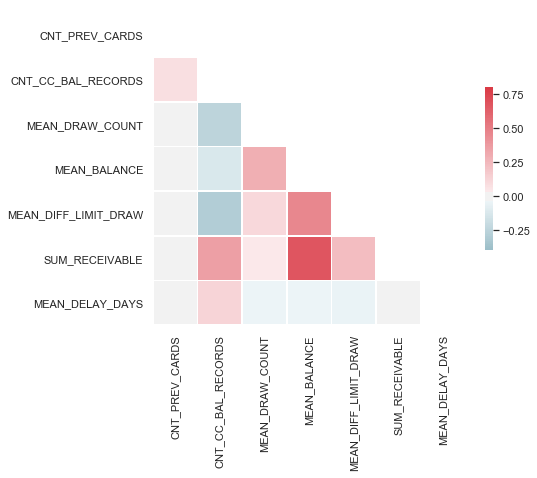

In [17]:
# Plot heatmap
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib plane
f, ax = plt.subplots(figsize = (7, 6))

# Customise a diversing colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap,vmin = -.4, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.margins(.02)
#plt.savefig('corr_agg_id.png')
plt.show()

Aggregation process for each applicant takes a bit of time - about 10.5 minutes.  After the long wait, we have 103558 rows and eight columns in our new data table.  First, as we want to overlook the new data, we apply pair-plot using seaborn module. There seem to be only-one-column histograms for the number of cards, the mean of the number of monthly draws and the mean of delays in days. From histograms of individual variables we can see that most people have had one credit card, use credit card no more than five times a month, hardly delay their payments. 

We apply to scatter plot to see the relationship between the number of records and the mean balance (the first scatter plot) - interestingly, people have more records have less balance; the colour of the points represents the number of cards - but the most points coloured with bright blue as over 90% of people have only one. It is hard to see the size of dots as the most people use the card less than five times a month.  The second scatter plot shows that the mean balance has a positive relationship with the total of receivables.  On the other hands, we cannot find much information from the third scatter plot.

We produce the correlation matrix and heat map - the mean of balances and the sum of receivables have the strongest correlation with the Pearson's coefficient of 0.67.

### Aggregate data in backward-time 

In [18]:
start = timeit.default_timer()
# List of current IDs
time_ids = cc_bal.MONTHS_BALANCE.unique()

# Empty list for storing the number of previous credit cards
record_counts = np.empty(len(time_ids))     # length of record 
draw_count_mean = np.empty(len(time_ids))   # mean of the montly drawings
bal_mean = np.empty(len(time_ids))          # mean of teh monthly balance
diff_limit_draw = np.empty(len(time_ids))   # mean of defferences between limit and draw
delay_days_mean = np.empty(len(time_ids))   # Mean of delayed payments in days

# Count the number of cards
for i in range(len(time_ids)):
    tid = time_ids[i]
    subset = cc_bal[cc_bal.MONTHS_BALANCE == tid]
    record_counts[i] = len(subset.SK_ID_CURR)
    draw_count_mean[i] = np.mean(subset.CNT_DRAWINGS_CURRENT)
    bal_mean[i] = np.mean(subset.AMT_BALANCE)
    diff_limit_draw[i] = np.mean(subset.AMT_CREDIT_LIMIT_ACTUAL  - subset.AMT_DRAWINGS_CURRENT)
    delay_days_mean[i] = np.mean(subset.SK_DPD)

cc_bal_time = pd.DataFrame({'MONTHS': time_ids,
                           'CNT_CC_BAL_RECORDS': record_counts,
                           'MEAN_DRAW_COUNT': draw_count_mean,
                           'MEAN_BALANCE': bal_mean,
                           'MEAN_DIFF_LIMIT_DRAW': diff_limit_draw,
                           'MEAN_DELAY_DAYS': delay_days_mean})
cc_bal_time = cc_bal_time[['MONTHS', 'CNT_CC_BAL_RECORDS','MEAN_DRAW_COUNT',
                           'MEAN_BALANCE', 'MEAN_DIFF_LIMIT_DRAW', 'MEAN_DELAY_DAYS']]
stop = timeit.default_timer()
print('Time of computing: {}'.format(hms(stop -  start)))

Time of computing: 2 seconds


In [19]:
# Order by time
cc_bal_time = cc_bal_time.sort_values('MONTHS')
cc_bal_time.head()

,MONTHS,CNT_CC_BAL_RECORDS,MEAN_DRAW_COUNT,MEAN_BALANCE,MEAN_DIFF_LIMIT_DRAW,MEAN_DELAY_DAYS
85,-96,11722.0,0.543337,63434.466623,111113.277731,0.393278
89,-95,12521.0,0.492133,63763.446413,112441.305531,0.384314
81,-94,13397.0,0.516757,64443.613043,111990.234034,0.434948
93,-93,14197.0,0.525393,65817.713607,112142.215225,0.438825
83,-92,14911.0,0.490108,66583.989138,113108.478381,0.418952


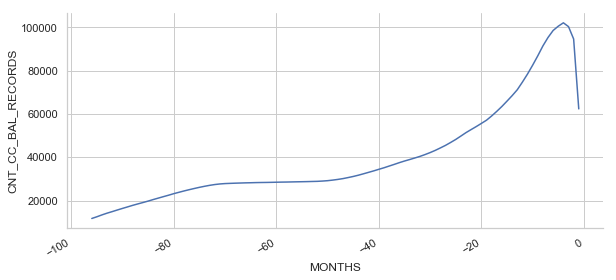

In [20]:
# Time-series plot for the number of records
g = sns.relplot(x = 'MONTHS', y = 'CNT_CC_BAL_RECORDS', kind = 'line', data = cc_bal_time)
g.fig.autofmt_xdate()
g.fig.set_size_inches(10, 4)

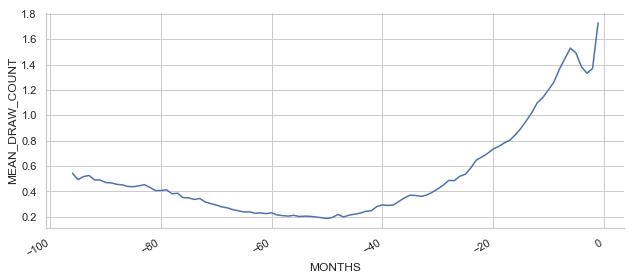

In [21]:
# Time-series plot for the mean of the number of monthly draws 
g = sns.relplot(x = 'MONTHS', y = 'MEAN_DRAW_COUNT', kind = 'line', data = cc_bal_time)
g.fig.autofmt_xdate()
g.fig.set_size_inches(10, 4)

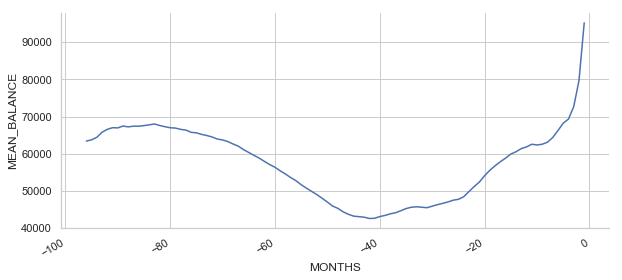

In [22]:
# Time-series plot for the mean of the monthly balance
g = sns.relplot(x = 'MONTHS', y = 'MEAN_BALANCE', kind = 'line', data = cc_bal_time)
g.fig.autofmt_xdate()
g.fig.set_size_inches(10, 4)


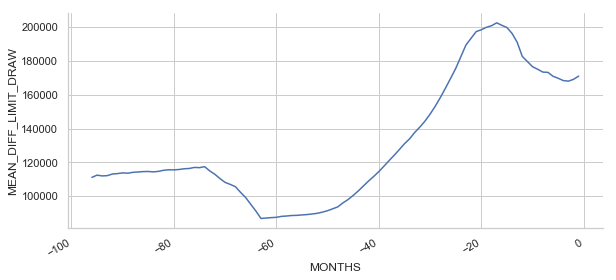

In [23]:
# Time-series plot for the mean of defference betwwen limit and draw
g = sns.relplot(x = 'MONTHS', y = 'MEAN_DIFF_LIMIT_DRAW', kind = 'line', data = cc_bal_time)
g.fig.autofmt_xdate()
g.fig.set_size_inches(10, 4)

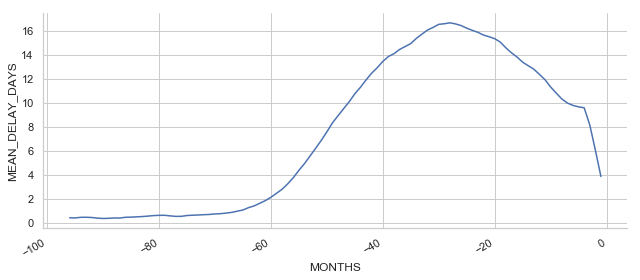

In [24]:
# Time-series plot for the mean of delay for payment in days
g = sns.relplot(x = 'MONTHS', y = 'MEAN_DELAY_DAYS', kind = 'line', data = cc_bal_time)
g.fig.autofmt_xdate()
g.fig.set_size_inches(10, 4)

In [25]:
# Correlation matrix
corr = cc_bal_time.corr()
corr

,MONTHS,CNT_CC_BAL_RECORDS,MEAN_DRAW_COUNT,MEAN_BALANCE,MEAN_DIFF_LIMIT_DRAW,MEAN_DELAY_DAYS
MONTHS,1.000000,0.887216,0.643611,-0.228905,0.741712,0.813775
CNT_CC_BAL_RECORDS,0.887216,1.000000,0.870474,0.144765,0.768409,0.541773
MEAN_DRAW_COUNT,0.643611,0.870474,1.000000,0.516229,0.763496,0.263342
MEAN_BALANCE,-0.228905,0.144765,0.516229,1.000000,0.120775,-0.636428
MEAN_DIFF_LIMIT_DRAW,0.741712,0.768409,0.763496,0.120775,1.000000,0.646016
MEAN_DELAY_DAYS,0.813775,0.541773,0.263342,-0.636428,0.646016,1.000000


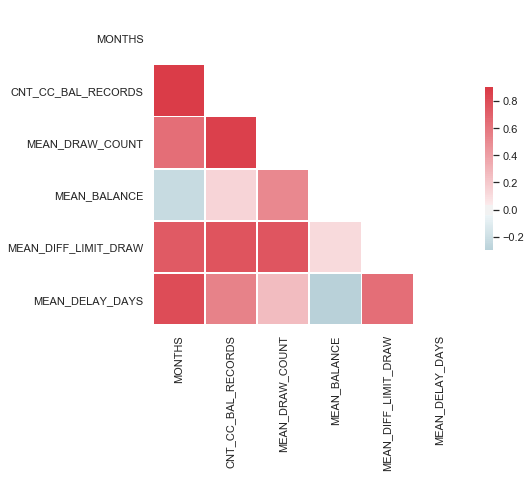

In [26]:
# Plot heatmap
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib plane
f, ax = plt.subplots(figsize = (7, 6))

# Customise a diversing colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap,vmin = -.3, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.margins(.02)
#plt.savefig('corr_agg_time.png')
plt.show()

Implementing the new table for the timewise aggregation takes just a couple of seconds - comparable to the earlier implementation for each applicant, revoke it was 10.5 minutes. This might be reasoned by the small number ot distinct time stamps, figured 96.

The first time-series plot shows that there is an increaing trend of the number of records until about five months before the applying a loan.  The plot of the mean of monthly draws represents a hyperbolic curve until the recent time.  Interestingly, the mean of monthly balances has a similar trend with the second plot of the mean monthly draws, except a bit of wavy curve at the early time with having a peak at the time of -85.  Comparing these, the plot of the difference between the limit and draw has a curvier shape - this one starts to rise earlier at about -50 and starts to drop from just after -20.  On the other hand, the mean of delays in days flats until -60, then shapes parabolic, which has a peak at about -30.  From these plots, we can conclude that mean balanbce is dramatically increase from the time of a year before applying for a loan, and the mean of delays seem to drop from the time of two years before applying.

The correlation matrix and heat map represent that the number of records and mean delay days have strong correlations with time. Similarly, the number of draws and the mean difference between the limit and the draw have moderately positive correlations with time.